## Models

Test out the following models:
K-Mode Clustering
XGBoost
Random Forest
Isomapping

GLM not necessary potentially?

In [2]:
# Necessary imports
#The foundation
#The models will be imported as needed
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [3]:
# Calling out the stored variable for our models from the Pre-Processing Notebook
from sklearn import datasets
%store -r df

In [3]:
df.head()

,ram_gb,ssd_gb,hdd_gb,graphic_card_gb,display_size,latest_price,os_bit_64,brand_APPLE,brand_ASUS,brand_Avita,...,ram_type_DDR5,ram_type_LPDDR3,ram_type_LPDDR4,ram_type_LPDDR4X,os_Mac,os_Windows,weight_Gaming,weight_ThinNlight,msoffice_Yes,Binarize_Warranty
0,4,0,1024,0,15.6,324.87,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,4,0,512,0,15.6,254.67,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4,128,0,0,15.6,259.87,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,4,128,0,0,15.6,279.37,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,4,256,0,0,15.6,324.87,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [92]:
#Create the dataset -> We are working with clustering so no need to create a train/test set
#X = df.drop('latest_price', axis = 1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

X = df
X.shape

#for labels
#y = df[['latest_price']]


In [17]:
#Scale our X accordingly using MinMaxScaler
X_to_scale = ['ram_gb', 'ssd_gb', 'hdd_gb', 'graphic_card_gb', 'latest_price']

#Initialize the MinMax Scaler
X_scaled = MinMaxScaler()

#Fit the X data for our numerical columns
X_scaled.fit(X[X_to_scale])

#Transform the X data for both the X_train and X_test
X_scaled = X_scaled.transform(X[X_to_scale])

#Convert these back to dataframes so we can add them back in
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns = X_to_scale)
#X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_to_scale)

In [18]:
#Add back in the columns
#All the other columns
X_other_columns = X.columns.drop(X_to_scale)

#Join from scaled to not-scaled
X = X_scaled.join(X[X_other_columns])

#Make sure we have no crazy join issues, we should have shape [896, 75] 
print(X.shape)

(896, 75)


In [88]:
#Start with K-Mode Clustering from: https://github.com/nicodv/kmodes
#Install using conda install -c conda-forge kmodes (on anaconda)
from kmodes import kmodes, kprototypes

In [89]:
#We will initialize our model - documentation here: https://github.com/nicodv/kmodes/blob/master/kmodes/kprototypes.py
#We need to first see how many clusters would be ideal for our algorithm
#Also define the initialization method utilizing Cao's algorithm

cost =[]
K = range(1,15)
#categorical indices
categorical = list(range(5,74))
for num in list(K):
    kmodes = kprototypes.KPrototypes(n_clusters = num, init = 'Cao', n_init = 5);
    kmodes.fit_predict(X, categorical = categorical);
    cost.append(kmodes.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [23]:
#It seems that 11 clusters is the ideal grouping for our data
kmodes = kprototypes.KPrototypes(n_clusters = 11, init = 'Cao', n_init = 5);
kmodes.fit_predict(X, categorical = categorical);

In [24]:
kmodes.labels_

array([ 4,  4,  4,  4,  4,  7,  8,  4,  8,  4,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  7,  0,  7,  6,  8,  8,  8,  7,
        8,  7,  7,  8,  7,  6,  7,  7,  6,  7,  7,  7,  7,  7,  7,  7,  4,
        7,  7,  7,  7,  7,  7,  7,  7,  4,  7,  7,  7,  7,  7,  7,  7,  4,
        7,  4,  7,  8,  6,  7,  7,  7,  7,  8,  7,  7,  8,  8,  4,  7,  8,
        7,  8,  8,  6,  8,  8,  6,  8,  4,  8,  7,  7,  7,  4,  8,  8,  7,
        7,  6,  6,  7,  7,  7,  8,  4,  7,  7,  7,  7,  6,  7,  7,  6,  7,
        7,  7,  7,  4,  7,  7,  7,  8,  7,  7,  7,  7,  6,  8,  6,  4,  6,
        7,  7,  4,  7,  7,  6,  7,  7,  4,  7,  6,  7,  7,  7,  7,  7,  6,
        7,  8,  7,  7,  0,  7,  8,  7,  6,  6,  8,  7,  7,  7,  7,  7,  7,
        8,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  7,  0,  8,  7,  7,
        8,  7,  8,  8,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  0,  7,
        7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  9,  9

## K Modes Thoughts

Although we were able to use K-Modes the inability to visualize or really understand the outputs of the clustering method makes it difficult to act upon. We're going to move on and try a different model.

-> potentially use price vs something else to interpret or pairwise at a time
https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177861-analyze-the-results-of-a-k-means-clustering



## Isomapping

In [4]:
# Might be useful to have categories like for Decision Tree
cuts = [150, 550, 950, 1350, 1750, 2150, 2550, 2950, 3350, 3750, 4150, 6000]
labels = ["$150-$550", "$550-$950", "$950-$1350","$1350-1750","$1750-$2150", "$2150-$2550",\
          "$2550-$2950", "$2950-$3350", "$3350-$3750", "$3750-$4150", "$4150 and up"]

df['price_cat'] = pd.cut(df['latest_price'], cuts, labels = labels)

In [14]:
#Create the dataset -> We are working with dimension reduction so no strict test/train set 
#Instead, we are looking at a way to explain our data.
#X = df.drop('latest_price', axis = 1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

X = df
X.shape

#for labels
X = df.drop(['price_cat'], axis = 1)
y = df[['price_cat']]
#y = df[['latest_price']]

In [19]:
from sklearn.manifold import Isomap

model = Isomap(n_neighbors = 6, n_components = 2)
model.fit(X)
manifold_2Da = model.transform(X)
manifold_2D = pd.DataFrame(manifold_2Da, columns = ['Component 1', 'Component 2'])

manifold_2D.head()

,Component 1,Component 2
0,1.730912,-0.540036
1,2.585129,-0.387654
2,2.526822,-1.964921
3,2.526807,-1.964935
4,2.527470,-1.966329


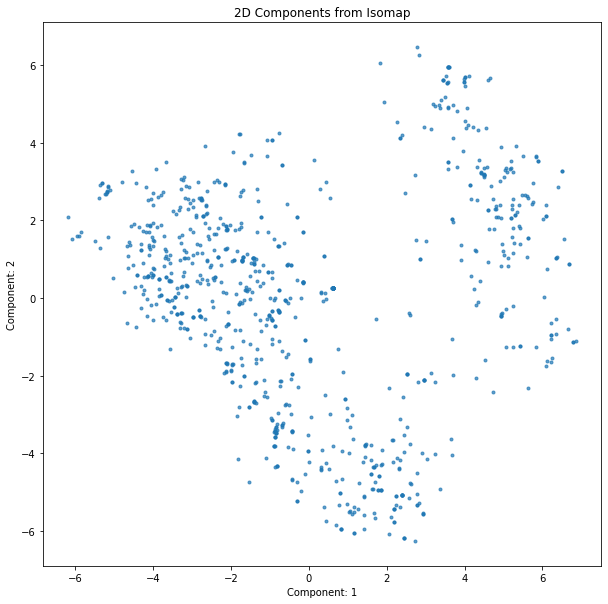

In [20]:
%matplotlib inline
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')
ax.scatter(x = manifold_2D['Component 1'], y = manifold_2D['Component 2'], marker='.', alpha=0.7)
plt.show()


In [100]:
model = Isomap(n_neighbors = 6, n_components = 3)
model.fit(X)
manifold_3Da = model.transform(X)
manifold_3D = pd.DataFrame(manifold_3Da, columns = ['Component 1', 'Component 2', 'Component 3'])

manifold_3D.head()

,Component 1,Component 2,Component 3
0,2358.247927,-324.055829,-1005.472755
1,1901.201453,303.201096,2985.295375
2,-2240.199690,-1654.582559,87.802099
3,-2229.033612,-1645.598658,85.545855
4,-2141.691101,-1574.752675,68.289080


<IPython.core.display.Javascript object>


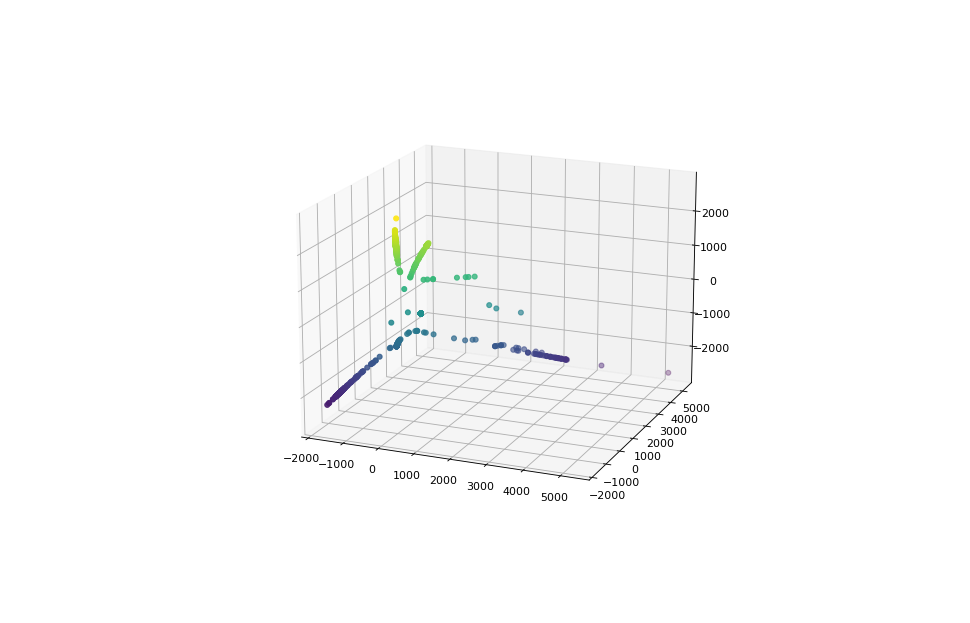

In [106]:
%matplotlib notebook

ax = plt.axes(projection = '3d')

zdata = manifold_3D['Component 1']
xdata = manifold_3D['Component 2']
ydata = manifold_3D['Component 2']
ax.scatter3D(xdata, ydata, zdata, c = zdata)

## XGboost and Random Forest Time

In [108]:
#We're going to make "categories" of prices because XGBoost likes to have labels
#We will build these categories based on priced ranges, lets first look at the range of prices we have

df['latest_price'].describe()

#With a maximum price of $5745 and a minimum price of $181.87 we want to avoid too many groups
#We will first try with  groups of 400, with the last group somewhat larger



count     896.000000
mean      992.028186
std       605.973607
min       181.870000
25%       591.370000
50%       825.422000
75%      1158.170000
max      5745.870000
Name: latest_price, dtype: float64

In [109]:
df['latest_price'].sort_values(ascending = False).head()

636    5745.87
649    4490.07
677    4029.87
632    3899.87
473    3785.47
Name: latest_price, dtype: float64

In [114]:
#creating our categories
cuts = [150, 550, 950, 1350, 1750, 2150, 2550, 2950, 3350, 3750, 4150, 6000]
labels = ["$150-$550", "$550-$950", "$950-$1350","$1350-1750","$1750-$2150", "$2150-$2550",\
          "$2550-$2950", "$2950-$3350", "$3350-$3750", "$3750-$4150", "$4150 and up"]

df['price_cat'] = pd.cut(df['latest_price'], cuts, labels = labels)


,price_cat,latest_price
0,$150-$550,324.87
1,$150-$550,254.67
2,$150-$550,259.87
3,$150-$550,279.37
4,$150-$550,324.87
...,...,...
891,$1750-$2150,1884.87
892,$1750-$2150,1949.87
893,$1750-$2150,1858.87
894,$150-$550,506.87


In [136]:
#Now that we have categories we can begin the XGBoost training
import xgboost as xgb

X = df.drop(['price_cat','latest_price'], axis = 1)
y = df[['price_cat']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

xgbr = xgb.XGBClassifier()

xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

C:\Users\lutim\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[21:48:18] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<Figure size 1080x1080 with 0 Axes>

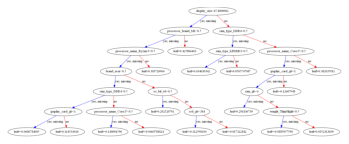

In [128]:
%matplotlib inline
figure = plt.figure(figsize=(15,15))
ax = xgb.plot_tree(xgbr)


plt.show()

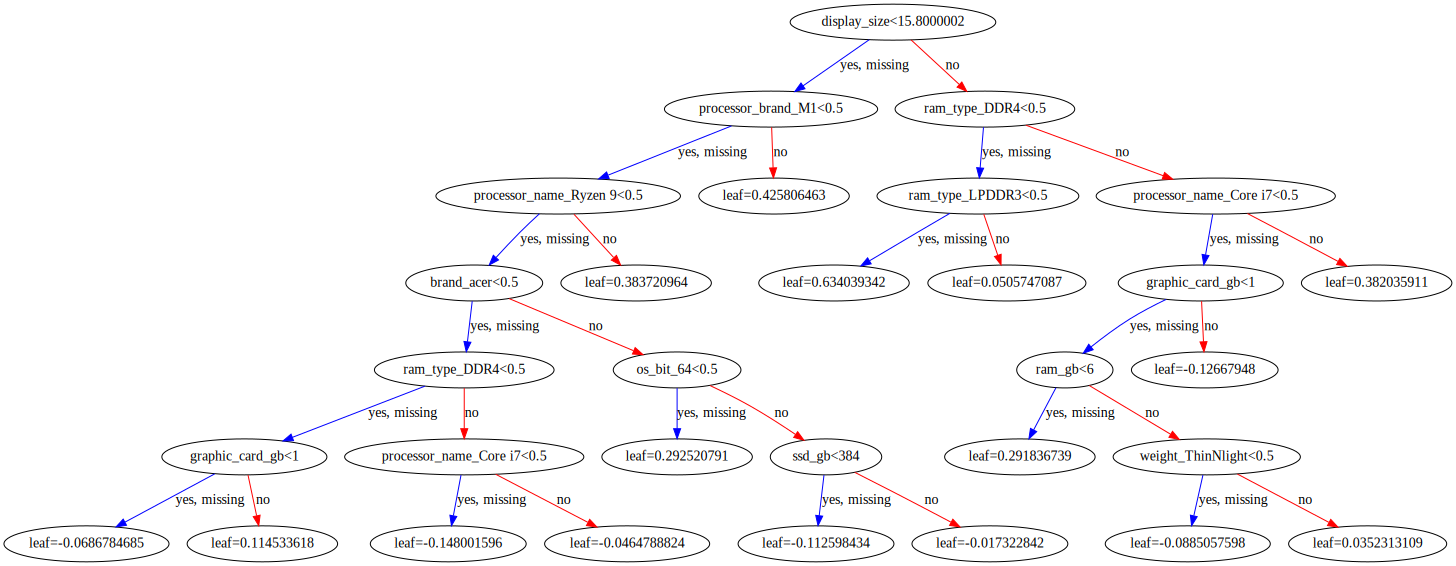

In [129]:
xgb.to_graphviz(xgbr)

In [141]:
#accuracy_score(y_test, y_pred)

NameError: name 'accuracy_score' is not defined